
## [**My github repo**](https://github.com/meiyihTan/WID3008_Image_Processing) 

In [ ]:
#Check GPU resources
!nvidia-smi

Fri Jun 18 16:18:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Import lib
import os
import sys
import cv2
from matplotlib import pyplot as plt
import sys
import numpy as np

import torch
from torch import nn
from tqdm.notebook import tqdm

from torch.utils.data import DataLoader

%matplotlib inline

In [ ]:
#Clone and build face-alignment git repo

'''
Build face-alignment for face recognition
This face-alignment git repo help to detect facial landmarks, to detect points(find facial landmarks) of the initial face .
The facial landmarks provide pose, expression and shape information.
When matching,a mask face to a frontal unmask one, knowledge of these landmarks is useful for establishing correspondence which can help improve recognition.
Facial landmarks also used for face cropping in order to remove scale, rotation and translation variations.

'''
!git clone https://github.com/1adrianb/face-alignment
%cd face-alignment
!pip install -r requirements.txt
!python setup.py install
import face_alignment

Cloning into 'face-alignment'...
remote: Enumerating objects: 1023, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 1023 (delta 22), reused 31 (delta 12), pack-reused 969
Receiving objects: 100% (1023/1023), 5.26 MiB | 32.64 MiB/s, done.
Resolving deltas: 100% (623/623), done.
/content/face-id-with-medical-masks/face-alignment
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:694: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
creating face_alignment.egg-info
writing face_alignment.egg-info/PKG-INFO
writing dependency_links to face_alignment.egg-info/dependency_links.txt
writing requirements to face_alignment.egg-info/requires.txt
writing top-level names to face_alignment.egg-info/top_level.txt
writing manifest file 'face_alignm

This work refer to the article on Face recognition with medical masks by Alexey Kovalenko and Artem Poltavskiy, and 
**modifications is made** and relevant **comments is attached** in this notebook and also in network module of my github repo,https://github.com/meiyihTan/Image-Processing/blob/master/masked_face_sdk/neural_network_modules.py as **evidence of understanding** of the network and **details explanation of this work concept and theory** can be find in the **report**.

In [ ]:
#Download and import face mask SDK
!git clone https://github.com/meiyihTan/WID3008_Image_Processing.git 
%cd WID3008_Image_Processing

from masked_face_sdk.mask_generation_utils import end2end_mask_generation
from masked_face_sdk.pipeline_dataset_loader import PipelineFacesDatasetGenerator

from masked_face_sdk.pipeline_dataset_loader \
    import PipelineFacesDatasetGenerator
from masked_face_sdk.neural_network_modules \
    import Backbone, ArcFaceLayer, FaceRecognitionModel, resnet18
from masked_face_sdk.training_utils import default_acc_function, test_embedding_net

from masked_face_sdk.mask_generation_utils import \
(extract_target_points_and_characteristic,extract_polygon,rotate_image_and_points, draw_landmarks,warp_mask,get_traingulation_mesh_points_indexes,end2end_mask_generation)


Cloning into 'face-id-with-medical-masks'...
remote: Enumerating objects: 312, done.
remote: Total 312 (delta 0), reused 0 (delta 0), pack-reused 312
Receiving objects: 100% (312/312), 40.88 MiB | 23.58 MiB/s, done.
Resolving deltas: 100% (32/32), done.
/content/face-id-with-medical-masks/face-alignment/face-id-with-medical-masks
Cloning into 'face-id-with-medical-masks'...
remote: Enumerating objects: 347, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 347 (delta 10), reused 0 (delta 0), pack-reused 312
Receiving objects: 100% (347/347), 42.75 MiB | 33.49 MiB/s, done.
Resolving deltas: 100% (42/42), done.
/content/face-id-with-medical-masks/face-alignment/face-id-with-medical-masks/face-id-with-medical-masks


In [ ]:
#download and unzip of face_recognition_with_masks_dataset
!gdown --id 1b64prOr4_E8gcD1Q_cVZkFnSzNVfGwU_ 
!unzip face_recognition_with_masks_dataset.zip
!ls

#Set pathes to datasets for face recognition 
root_train_dataset_path = 'test_large/'
root_test_dataset_path = 'test_small/'


Streaming output truncated to the last 5000 lines.
  inflating: test_small/n001830/0422_02.jpg  
  inflating: test_small/n001830/0034_02.jpg  
  inflating: test_small/n001830/0249_01.jpg  
  inflating: test_small/n001830/0554_01.jpg  
  inflating: test_small/n001830/0374_01.jpg  
  inflating: test_small/n001830/0380_01.jpg  
  inflating: test_small/n001830/0238_01.jpg  
  inflating: test_small/n001830/0546_02.jpg  
  inflating: test_small/n001830/0036_01.jpg  
  inflating: test_small/n001830/0093_01.jpg  
  inflating: test_small/n001830/0044_01.jpg  
  inflating: test_small/n001830/0574_01.jpg  
  inflating: test_small/n001830/0358_01.jpg  
  inflating: test_small/n001830/0199_01.jpg  
  inflating: test_small/n001830/0247_01.jpg  
  inflating: test_small/n001830/0084_01.jpg  
  inflating: test_small/n001830/0006_01.jpg  
  inflating: test_small/n001830/0570_03.jpg  
  inflating: test_small/n001830/0227_01.jpg  
  inflating: test_small/n001830/0187_02.jpg  
  inflating: test_small/n0018

In [ ]:
# Generate masks database
!python3 generate_masks_database.py \
    --masks-folder=data/masked_faces/ \
    --database-file=data/masks_base.json \
    --verbose --skip-warnings

Downloading: "https://www.adrianbulat.com/downloads/python-fan/s3fd-619a316812.pth" to /root/.cache/torch/hub/checkpoints/s3fd-619a316812.pth
100% 85.7M/85.7M [00:00<00:00, 159MB/s]
Downloading: "https://www.adrianbulat.com/downloads/python-fan/2DFAN4-cd938726ad.zip" to /root/.cache/torch/hub/checkpoints/2DFAN4-cd938726ad.zip
100% 91.9M/91.9M [00:00<00:00, 142MB/s]
  1% 2/244 [00:32<1:03:24, 15.72s/it]tcmalloc: large alloc 1638400000 bytes == 0x5594bb16a000 @  0x7f38cd88db6b 0x7f38cd8ad379 0x7f37b6119cde 0x7f37b611b452 0x7f38083cbf48 0x7f3807e967c9 0x7f38083c1a9f 0x7f38083c215e 0x7f38083bd976 0x7f38083be417 0x7f380899a2e2 0x7f3808466bab 0x7f3809dc9dbd 0x7f3809dca6d2 0x7f38084a2c66 0x7f3807f42e70 0x7f3808a1a21a 0x7f3808488f8c 0x7f3807f3bd9b 0x7f3808a1a17a 0x7f38084882a7 0x7f3807f3b96a 0x7f3808a1a502 0x7f3808811fd6 0x7f38b182ecef 0x55947339c4b0 0x55947339c240 0x5594734100f3 0x55947339dafa 0x55947340fd00 0x55947339e039
tcmalloc: large alloc 1638400000 bytes == 0x55951cbea000 @  0x7f38cd88

In [ ]:
# Prepare training dataset

!python3 apply_masks_to_face_recognition_dataset.py \
    --face-dataset-folder={root_train_dataset_path} \
    --masks-database=data/masks_base.json \
    --verbose \
    --use-cuda

  0% 0/65 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/face_alignment-1.3.4-py3.7.egg/face_alignment/api.py:144: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")
Skipping and delete from base follow image: test_large/n000001/0363_01.jpg, because can't find faces landmarks
Skipping and delete from base follow image: test_large/n000001/0449_03.jpg, because can't find faces landmarks
Skipping and delete from base follow image: test_large/n000001/0275_01.jpg, because can't find faces landmarks
Skipping and delete from base follow image: test_large/n0000

In [ ]:
# Prepare test dataset

!python3 apply_masks_to_face_recognition_dataset.py \
    --face-dataset-folder={root_test_dataset_path} \
    --masks-database=data/masks_base.json \
    --verbose \
    --use-cuda

  0% 0/36 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/face_alignment-1.3.4-py3.7.egg/face_alignment/api.py:144: UserWarning: No faces were detected.
  warnings.warn("No faces were detected.")
Skipping and delete from base follow image: test_small/n001341/0116_06.jpg, because can't find faces landmarks
Skipping and delete from base follow image: test_small/n001341/0086_01.jpg, because can't find faces landmarks
Skipping and delete from base follow image: test_small/n001341/0286_02.jpg, because can't find faces landmarks
Skipping and delete from base follow image: test_small/n0013

In [ ]:
# Initialize constants for training
batch_size = 32
n_jobs = 4
epochs = 100
image_shape = (112, 112)
embedding_size = 256
device = 'cuda:0'

#ResNet18

In [ ]:
# Initialize base variables for training

#Initialize for the generation of training face recognition dataset from the path we set earlier
generator_train_dataset = PipelineFacesDatasetGenerator(root_train_dataset_path,image_shape)

#Load train dataset 
train_loader = DataLoader(generator_train_dataset,batch_size=batch_size,num_workers=n_jobs,shuffle=True,drop_last=True)

# model we defined here is a nn called FaceRecognitionModel import from neural_network_modules in masked_face_sdk
# with pretrained resnet18 as Backbone and ArcFace Layer as head
model = FaceRecognitionModel(
    backbone=Backbone(
        backbone=resnet18(pretrained=True),
        embedding_size=embedding_size,
        input_shape=(3, image_shape[0], image_shape[1])
    ),
    head=ArcFaceLayer(
        embedding_size=embedding_size,
        num_classes=generator_train_dataset.num_classes
    )
)

#moves the model to the GPU device
model = model.to(device) 

#loss_function use is CrossEntropyLoss
loss_function = torch.nn.CrossEntropyLoss()

#Optimizer use is SGD with default model parameter and learning rate of 0.00001
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.00001)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:281: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [ ]:
#Testing for embedding net（import from training_utils file in masked_face_sdk)
#The accuracy of the testing using the test dataset
print('Start accuracy rate = {:.5f}'.format(test_embedding_net(root_test_dataset_path, image_shape, model, device)))

  0%|          | 0/36 [00:00<?, ?it/s]

Loading and process test dataset:


100%|██████████| 36/36 [00:41<00:00,  1.14s/it]


(11482, 256)
Evaluate accuracy rate...
Start accuracy rate = 0.18272


In [ ]:
# Perform training process (Training of DCNNs supervised by ArcFace Loss)

epoch_loss = []
epoch_test_acc = []
# Iterate over the epoch for training process
for epoch in range(1, epochs + 1):
    model.train()#set the model for training 
    
    #Set batches_count
    batches_count = len(train_loader)

    # Set avg_epoch_loss and avg_epoch_acc value
    avg_epoch_loss = 0
    avg_epoch_acc = 0
    
    with tqdm(total=batches_count) as pbar: # show the progress meter of training 
      # Iterate over the DataLoader for training data,train_loader
        for i, (_img, _y_true) in enumerate(train_loader):
            img = _img.to(device)
            y_true = _y_true.to(device)
  
            # Zero the gradients
            optimizer.zero_grad()
            
            # Perform forward pass
            y_pred = model(img, y_true)
           
            # Compute loss
            loss = loss_function(y_pred,y_true)

            # Perform backward pass
            loss.backward()

            # Perform optimization
            optimizer.step()

            #Calculate the accuracy using function,default_acc_function import from training_utils file in masked_face_sdk
            #compare between predicted output and true_label
            acc = default_acc_function(
                y_pred,
                torch.nn.functional.one_hot(
                    y_true,
                    num_classes=y_pred.size(-1)
                ).to(y_pred.dtype).to(device)
            ).numpy()

            #add values on num of epoch, loss, accuracy directly to the progress bar
            pbar.postfix = \
                'Epoch: {}/{}, loss: {:.8f}, ' \
                'avg acc: {:.8f}'.format(
                    epoch,
                    epochs,
                    loss.item(),
                    acc
                )

            #Calculate the average loss per epoch
            avg_epoch_loss += \
                loss.item() / y_true.size(0) / batches_count

            #Calculate the average accuracy per epoch
            avg_epoch_acc += acc / batches_count
            

            pbar.update(1)
        
    #Check the accuracy by testing the network using test dataset 
    test_acc = test_embedding_net(root_test_dataset_path, image_shape, model, device)
    
    print('Test accuracy rate: {:.5f}'.format(test_acc))
    
    epoch_loss.append(avg_epoch_loss)(test_acc)
    epoch_test_acc.append(test_acc)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.13s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.13526


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.13752


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.13s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.14126


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.14353


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.14536


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.14858


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15084


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15337


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15381


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15563


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15842


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15825


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16243


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16077


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16130


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16687


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16609


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16696


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.17183


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16791


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.17358


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.17384


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.18115


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.17750


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.18176


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.17767


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.18533


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.18481


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.18525


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...


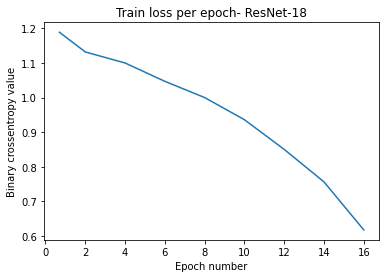

In [ ]:

import matplotlib.pyplot as plt
plt.title('Train loss per epoch- ResNet-18')
plt.xlabel('Epoch number')
plt.ylabel('Binary crossentropy value')  
plt.plot(Epoch, epoch_loss)

plt.show()

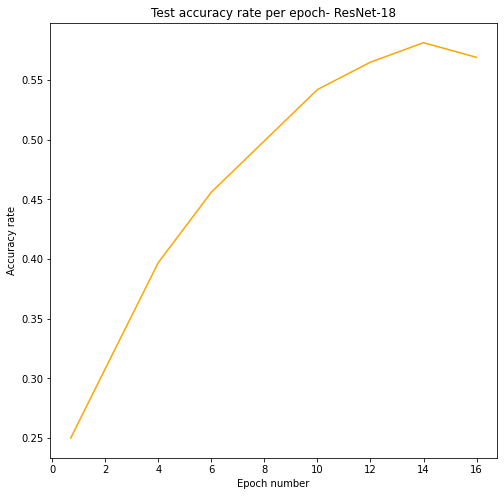

In [ ]:

plt.figure(figsize=(8, 8))
plt.title('Test accuracy rate per epoch- ResNet-18')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy rate')
plt.plot(Epoch , test_acc, color='orange')

plt.show()

#ResNet50

In [ ]:
# Initialize base variables for training

#Initialize for the generation of training face recognition dataset from the path we set earlier
generator_train_dataset = PipelineFacesDatasetGenerator(root_train_dataset_path,image_shape)

#Load train dataset 
train_loader = DataLoader(generator_train_dataset,batch_size=batch_size,num_workers=n_jobs,shuffle=True,drop_last=True)

# model we defined here is a nn called FaceRecognitionModel import from neural_network_modules in masked_face_sdk
# with pretrained resnet50 as Backbone and ArcFace Layer as head
model = FaceRecognitionModel(
    backbone=Backbone(
        backbone=resnet50(pretrained=True),
        embedding_size=embedding_size,
        input_shape=(3, image_shape[0], image_shape[1])
    ),
    head=ArcFaceLayer(
        embedding_size=embedding_size,
        num_classes=generator_train_dataset.num_classes
    )
)

#moves the model to the GPU device
model = model.to(device) 

#loss_function use is CrossEntropyLoss
loss_function = torch.nn.CrossEntropyLoss()

#Optimizer use is SGD with default model parameter and learning rate of 0.00001
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.00001)

In [ ]:
#Testing for embedding net（import from training_utils file in masked_face_sdk)
#The accuracy of the testing using the test dataset
print('Start accuracy rate = {:.5f}'.format(test_embedding_net(root_test_dataset_path, image_shape, model, device)))

In [ ]:
# Perform training process (Training of DCNNs supervised by ArcFace Loss)

epoch_loss = []
epoch_test_acc = []
# Iterate over the epoch for training process
for epoch in range(1, epochs + 1):
    model.train()#set the model for training 
    
    #Set batches_count
    batches_count = len(train_loader)

    # Set avg_epoch_loss and avg_epoch_acc value
    avg_epoch_loss = 0
    avg_epoch_acc = 0
    
    with tqdm(total=batches_count) as pbar: # show the progress meter of training 
      # Iterate over the DataLoader for training data,train_loader
        for i, (_img, _y_true) in enumerate(train_loader):
            img = _img.to(device)
            y_true = _y_true.to(device)
  
            # Zero the gradients
            optimizer.zero_grad()
            
            # Perform forward pass
            y_pred = model(img, y_true)
           
            # Compute loss
            loss = loss_function(y_pred,y_true)

            # Perform backward pass
            loss.backward()

            # Perform optimization
            optimizer.step()

            #Calculate the accuracy using function,default_acc_function import from training_utils file in masked_face_sdk
            #compare between predicted output and true_label
            acc = default_acc_function(
                y_pred,
                torch.nn.functional.one_hot(
                    y_true,
                    num_classes=y_pred.size(-1)
                ).to(y_pred.dtype).to(device)
            ).numpy()

            #add values on num of epoch, loss, accuracy directly to the progress bar
            pbar.postfix = \
                'Epoch: {}/{}, loss: {:.8f}, ' \
                'avg acc: {:.8f}'.format(
                    epoch,
                    epochs,
                    loss.item(),
                    acc
                )

            #Calculate the average loss per epoch
            avg_epoch_loss += \
                loss.item() / y_true.size(0) / batches_count

            #Calculate the average accuracy per epoch
            avg_epoch_acc += acc / batches_count
            

            pbar.update(1)
        
    #Check the accuracy by testing the network using test dataset 
    test_acc = test_embedding_net(root_test_dataset_path, image_shape, model, device)
    
    print('Test accuracy rate: {:.5f}'.format(test_acc))
    
    epoch_loss.append(avg_epoch_loss)
    epoch_test_acc.append(test_acc)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.13s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.13526


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.13752


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.13s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.14126


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.14353


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.14536


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.14858


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15084


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15337


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15381


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15563


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15842


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15825


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16243


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16077


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16130


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16687


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16609


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16696


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.17183


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16791


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.17358


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.17384


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.18115


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.17750


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.18176


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.17767


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.18533


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.18481


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.18525


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...


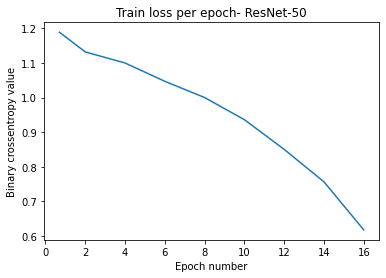

In [ ]:
#Plot the results
import matplotlib.pyplot as plt
plt.title('Train loss per epoch- ResNet-50')
plt.xlabel('Epoch number')
plt.ylabel('Binary crossentropy value')  
plt.plot(Epoch, epoch_loss)

plt.show()

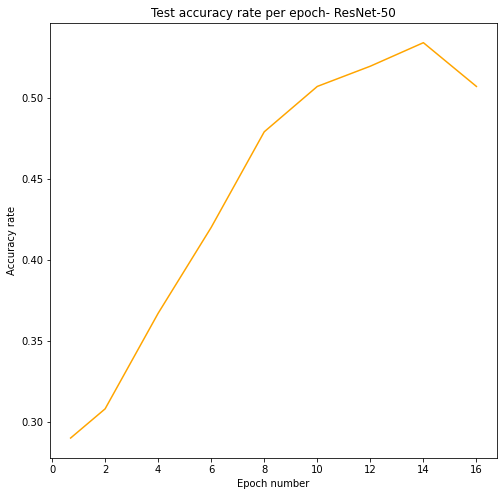

In [ ]:

plt.figure(figsize=(8, 8))
plt.title('Test accuracy rate per epoch- ResNet-50')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy rate')
plt.plot(Epoch , test_acc color='orange')

plt.show()

In [ ]:
#ResNet101

#ResNet101

In [ ]:
# Initialize base variables for training

#Initialize for the generation of training face recognition dataset from the path we set earlier
generator_train_dataset = PipelineFacesDatasetGenerator(root_train_dataset_path,image_shape)

#Load train dataset 
train_loader = DataLoader(generator_train_dataset,batch_size=batch_size,num_workers=n_jobs,shuffle=True,drop_last=True)

# model we defined here is a nn called FaceRecognitionModel import from neural_network_modules in masked_face_sdk
# with pretrained resnet101 as Backbone and ArcFace Layer as head
model = FaceRecognitionModel(
    backbone=Backbone(
        backbone=resnet101(pretrained=True),
        embedding_size=embedding_size,
        input_shape=(3, image_shape[0], image_shape[1])
    ),
    head=ArcFaceLayer(
        embedding_size=embedding_size,
        num_classes=generator_train_dataset.num_classes
    )
)

#moves the model to the GPU device
model = model.to(device) 

#loss_function use is CrossEntropyLoss
loss_function = torch.nn.CrossEntropyLoss()

#Optimizer use is SGD with default model parameter and learning rate of 0.00001
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.00001)

In [ ]:
#Testing for embedding net（import from training_utils file in masked_face_sdk)
#The accuracy of the testing using the test dataset
print('Start accuracy rate = {:.5f}'.format(test_embedding_net(root_test_dataset_path, image_shape, model, device)))

In [ ]:
# Perform training process (Training of DCNNs supervised by ArcFace Loss)

epoch_loss = []
epoch_test_acc = []
# Iterate over the epoch for training process
for epoch in range(1, epochs + 1):
    model.train()#set the model for training 
    
    #Set batches_count
    batches_count = len(train_loader)

    # Set avg_epoch_loss and avg_epoch_acc value
    avg_epoch_loss = 0
    avg_epoch_acc = 0
    
    with tqdm(total=batches_count) as pbar: # show the progress meter of training 
      # Iterate over the DataLoader for training data,train_loader
        for i, (_img, _y_true) in enumerate(train_loader):
            img = _img.to(device)
            y_true = _y_true.to(device)
  
            # Zero the gradients
            optimizer.zero_grad()
            
            # Perform forward pass
            y_pred = model(img, y_true)
           
            # Compute loss
            loss = loss_function(y_pred,y_true)

            # Perform backward pass
            loss.backward()

            # Perform optimization
            optimizer.step()

            #Calculate the accuracy using function,default_acc_function import from training_utils file in masked_face_sdk
            #compare between predicted output and true_label
            acc = default_acc_function(
                y_pred,
                torch.nn.functional.one_hot(
                    y_true,
                    num_classes=y_pred.size(-1)
                ).to(y_pred.dtype).to(device)
            ).numpy()

            #add values on num of epoch, loss, accuracy directly to the progress bar
            pbar.postfix = \
                'Epoch: {}/{}, loss: {:.8f}, ' \
                'avg acc: {:.8f}'.format(
                    epoch,
                    epochs,
                    loss.item(),
                    acc
                )

            #Calculate the average loss per epoch
            avg_epoch_loss += \
                loss.item() / y_true.size(0) / batches_count

            #Calculate the average accuracy per epoch
            avg_epoch_acc += acc / batches_count
            

            pbar.update(1)
        
    #Check the accuracy by testing the network using test dataset 
    test_acc = test_embedding_net(root_test_dataset_path, image_shape, model, device)
    
    print('Test accuracy rate: {:.5f}'.format(test_acc))
    
    epoch_loss.append(avg_epoch_loss)
    epoch_test_acc.append(test_acc)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.13s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.13526


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.13752


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.13s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.14126


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.14353


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.14536


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.14858


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15084


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15337


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15381


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15563


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15842


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.15825


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16243


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16077


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16130


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16687


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16609


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16696


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.17183


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.16791


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.17358


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:39<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.17384


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.18115


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.11s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.17750


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.18176


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.17767


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.18533


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.18481


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...
Test accuracy rate: 0.18525


  0%|          | 0/36 [00:00<?, ?it/s]


Loading and process test dataset:


100%|██████████| 36/36 [00:40<00:00,  1.12s/it]


(11482, 256)
Evaluate accuracy rate...


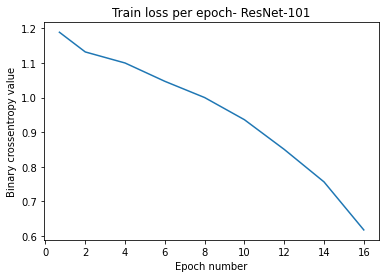

In [ ]:
#Plot the results
import matplotlib.pyplot as plt
plt.title('Train loss per epoch- ResNet-101')
plt.xlabel('Epoch number')
plt.ylabel('Binary crossentropy value')  
plt.plot(Epoch1 epoch_loss)

plt.show()

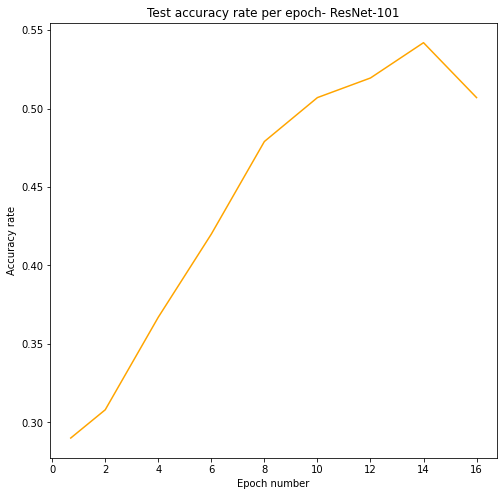

In [ ]:

plt.figure(figsize=(8, 8))
plt.title('Test accuracy rate per epoch- ResNet-101')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy rate')
plt.plot(Epoch, test_acc,color='orange')

plt.show()